In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Import data

Dataset on bike rental form UCI:
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

In [15]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Courses\\python_data_exploration_tutorial\\"
filename = ROOT + 'data\\hour.csv'

In [16]:
# Import csv file as pandas DataFrame
data_bike_rent = pd.read_csv(filename, delimiter=',') #, nrows = 1000)

In [17]:
data_bike_rent.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

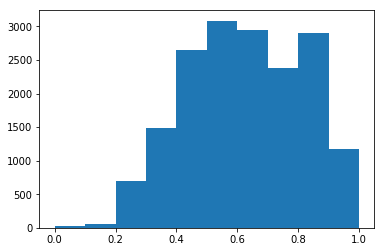

In [18]:
plt.hist(data_bike_rent.hum, 10)

In [108]:
# Correlation matrix
def plot_corr_matrix(df, graphWidth):
    
    # Remove NaN's
    df = df.dropna('columns')
    
    # Calculate correlation matrix
    corr = df.corr()
    
    # Plot
    fig = plt.figure(num=None, figsize=(graphWidth, graphWidth), facecolor='w', edgecolor='k')
    fig = plt.matshow(corr, fignum = 1, cmap = 'viridis')
    
    """# Alternative would be pcolor
    ax = fig.add_subplot(111)
    fig = plt.pcolor(corr, edgecolors='k', linewidths=2)
    ax.set_aspect(1)"""
    
    # Set axis labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    #plt.axis('equal')
    plt.colorbar(fig)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

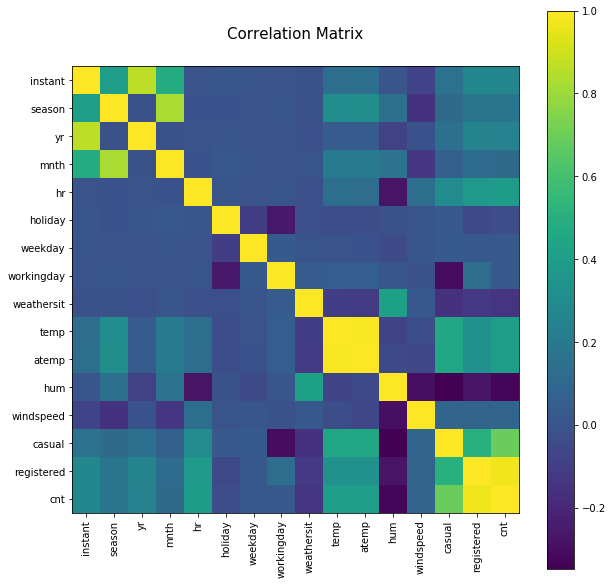

In [109]:
plot_corr_matrix(data_bike_rent, 10)

### Alternative: use build in function from seaborn

In [60]:
import seaborn as sns

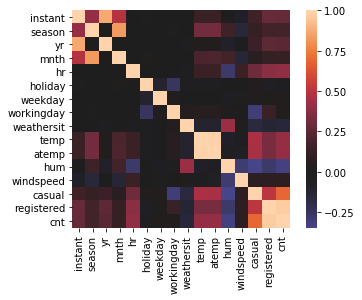

In [72]:
corr = data_bike_rent.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            #cmap=sns.diverging_palette(220, 10, as_cmap=True),
           center=0,
           square=True)

## From correlation matrix we can dig deeper...

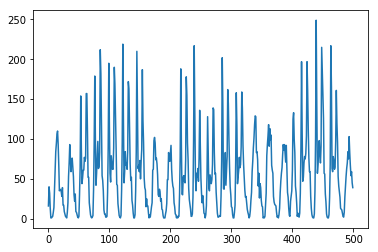

In [116]:
plt.plot(data_bike_rent['cnt'][:500])

### Sliced, queries...

In [119]:
data1 = data_bike_rent[(data_bike_rent['hr'] == 0) & (data_bike_rent['weekday'] == 1)]['cnt']

In [125]:
data_day1 = data_bike_rent[data_bike_rent['weekday'] == 1][['hr', 'cnt']]

In [142]:
data_day1[:30]

,hr,cnt
47,0,5
48,1,2
49,4,1
50,5,3
51,6,30
52,7,64
53,8,154
54,9,88
55,10,44
56,11,51


In [148]:
data = data_bike_rent[data_bike_rent['weekday'] == 1]['cnt'].values
data_hr = data_bike_rent[data_bike_rent['weekday'] == 1]['hr'].values
data.shape, data_hr.shape

((2479,), (2479,))

In [149]:
data

array([ 5,  2,  1, ..., 90, 61, 49], dtype=int64)

In [150]:
np.where(data_hr == 0)[0]

array([   0,   22,   46,   70,   93,  117,  141,  165,  189,  211,  234,
        257,  280,  303,  327,  350,  374,  398,  422,  446,  470,  494,
        518,  542,  566,  590,  614,  638,  662,  686,  710,  734,  758,
        782,  806,  830,  854,  877,  901,  925,  949,  973,  997, 1021,
       1045, 1069, 1093, 1117, 1140, 1164, 1188, 1212, 1235, 1258, 1282,
       1306, 1330, 1354, 1377, 1401, 1424, 1448, 1472, 1496, 1520, 1544,
       1567, 1591, 1615, 1639, 1663, 1687, 1711, 1735, 1759, 1783, 1807,
       1831, 1855, 1879, 1903, 1927, 1951, 1975, 1999, 2023, 2047, 2071,
       2095, 2119, 2143, 2167, 2191, 2215, 2239, 2263, 2264, 2288, 2312,
       2336, 2360, 2384, 2408, 2432, 2455], dtype=int64)

In [151]:
data[np.where(data_hr == 0)[0]]

array([  5,   5,  17,   7,   7,  15,  11,  37,  30,   4,  11,  13,  12,
         6,  23,  39,  12, 177,  53,  38,  41, 103,  29,  28,  26,  32,
       140,  35,  51,  34,  29,  30,  25,  40,  34,  97,  16,  37,  29,
        16,  53,  37,  32,  23,  15,  30,  17,  16,  24,  20,  17,  11,
        39,  15,  25,  19,  10,  21,   9,  41,  29,  17,  24,  23,  33,
        17,  37,  41,   6,  48,  34,  35,  40,  65,  49,  41,  40,  68,
        43,  39,  43,  47,  58,  33,  47,  26,  32, 104,  41,  45,  64,
        45,  51,  48,  31,  22,  23,  49,  27,  23,  21,  20,  28,  12,
        34], dtype=int64)

In [163]:
# Sort data by time and day

data_timed = np.zeros((24,7))
for day in range(7):
    data = data_bike_rent[data_bike_rent['weekday'] == day]['cnt'].values
    data_hr = data_bike_rent[data_bike_rent['weekday'] == day]['hr'].values
    for hour in range(24):
        cnts = data[np.where(data_hr == hour)[0]]
        data_timed[hour, day] = np.sum(cnts)/cnts.shape[0]

In [164]:
data_timed[:,0]

array([ 93.99038462,  77.43269231,  61.62745098,  31.14423077,
         9.3627451 ,   8.69387755,  14.49514563,  33.1047619 ,
        83.85714286, 156.54285714, 258.58095238, 315.38095238,
       372.96190476, 374.93333333, 363.62857143, 353.93333333,
       355.4       , 318.77142857, 272.62857143, 225.47619048,
       168.02857143, 127.64761905,  94.12380952,  61.8952381 ])

Text(0,0.5,'cnt')

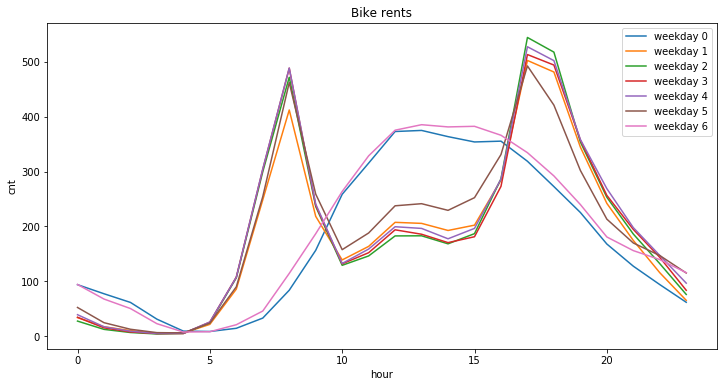

In [171]:
fig = plt.figure(num=None, figsize=(12,6))
for day in range(7):
    plt.plot(data_timed[:,day], label = "weekday "+str(day))
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel('cnt')

In [173]:
# Generalize a bit...

# Sort data by time and day
def sort_by_time(selected_feature):
    """ selected_feature must be column name """
    data_timed = np.zeros((24,7))
    for day in range(7):
        data = data_bike_rent[data_bike_rent['weekday'] == day][selected_feature].values
        data_hr = data_bike_rent[data_bike_rent['weekday'] == day]['hr'].values
        for hour in range(24):
            feature = data[np.where(data_hr == hour)[0]]
            data_timed[hour, day] = np.sum(feature)/feature.shape[0]
    return data_timed

Text(0,0.5,'casual clients')

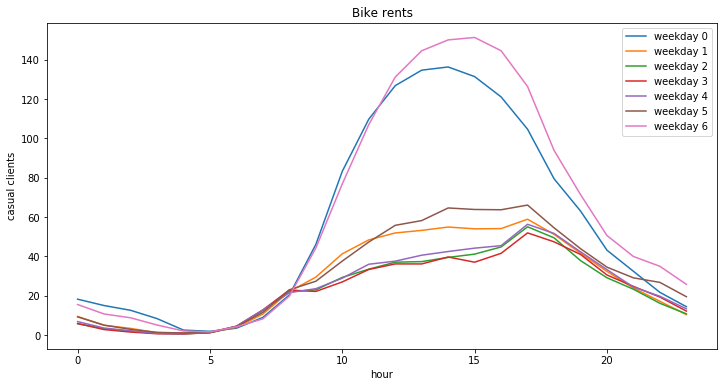

In [175]:
data_casual = sort_by_time('casual')

fig = plt.figure(num=None, figsize=(12,6))
for day in range(7):
    plt.plot(data_casual[:,day], label = "weekday "+str(day))
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel('casual clients')

### Explore other correlations

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

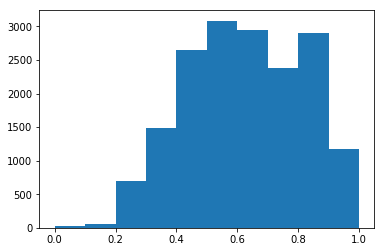

In [177]:
plt.hist(data_bike_rent['hum'])

In [178]:
np.histogram(data_bike_rent['hum'])

(array([  23,   55,  696, 1481, 2641, 3084, 2940, 2384, 2900, 1175],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [185]:
IDs = data_bike_rent.index[(data_bike_rent['hum'] < 1.5) & (data_bike_rent['hum'] > 0.9)].values

(array([763., 203.,  90.,  51.,  26.,  15.,   8.,   5.,   2.,   5.]),
 array([  1.,  74., 147., 220., 293., 366., 439., 512., 585., 658., 731.]),
 <a list of 10 Patch objects>)

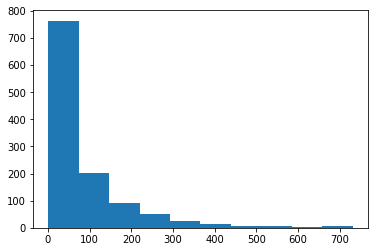

In [186]:
plt.hist(data_bike_rent.loc[IDs, 'cnt'])

In [253]:
# weekend <-> working day
# humidity

# Sort data by time and day
def sort_by_humidity(selected_feature, selected_days, bins_hum):
    """ Split into selected days and humity bins """
    data_timed = np.zeros((24, len(bins_hum)-1))                         
    data_timed_var = np.zeros((24, len(bins_hum)-1)) 
                          
    for i in range(len(bins_hum)-1):
        data = data_bike_rent[(data_bike_rent['weekday'].isin(selected_days)) & 
                              (data_bike_rent['hum'] <= bins_hum[i+1]) & 
                              (data_bike_rent['hum'] > bins_hum[i])] #[['hr', feature]]   
        data_hr = data['hr'].values
        data = data[selected_feature].values
        for hour in range(24):
            feature = data[np.where(data_hr == hour)[0]]
            data_timed[hour, i] = np.sum(feature)/feature.shape[0]
            data_timed_var[hour, i] = np.std(feature)
    return data_timed, data_timed_var

Text(0,0.5,'cnt')

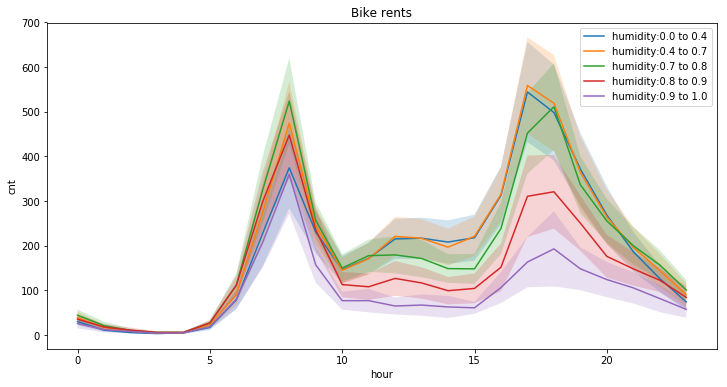

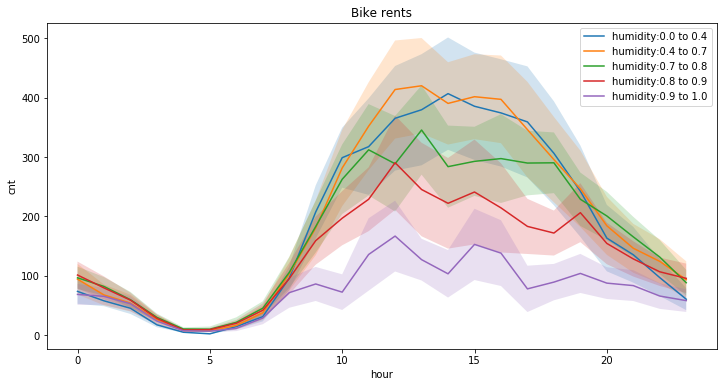

In [256]:
bins_hum = [0., 0.4, 0.7, 0.8, 0.9, 1. ]
selected_feature = 'cnt'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)

fig = plt.figure(num=None, figsize=(12,6))
for i in range(len(bins_hum)-1):
    y = data_humidity[:, i]
    plt.plot(y, label = "humidity:"+str(bins_hum[i])+" to "+str(bins_hum[i+1]))
    plt.fill_between(np.arange(24), y-0.5*error[:, i], y+0.5*error[:, i], alpha = 0.2)
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel(selected_feature)



data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)

fig = plt.figure(num=None, figsize=(12,6))
for i in range(len(bins_hum)-1):
    y = data_humidity[:, i]
    plt.plot(y, label = "humidity:"+str(bins_hum[i])+" to "+str(bins_hum[i+1]))
    plt.fill_between(np.arange(24), y-0.5*error[:, i], y+0.5*error[:, i], alpha = 0.2)
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel(selected_feature)

Text(0,0.5,'casual')

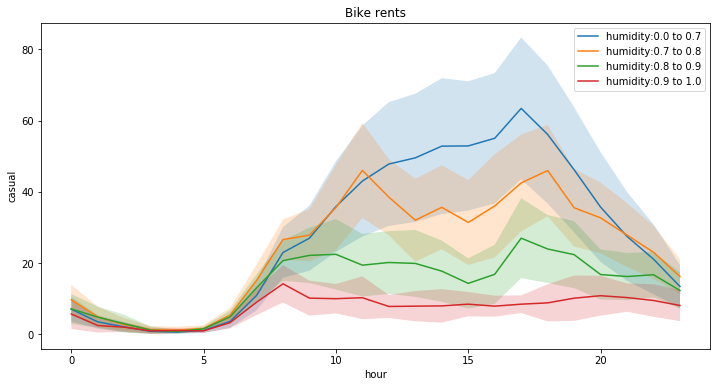

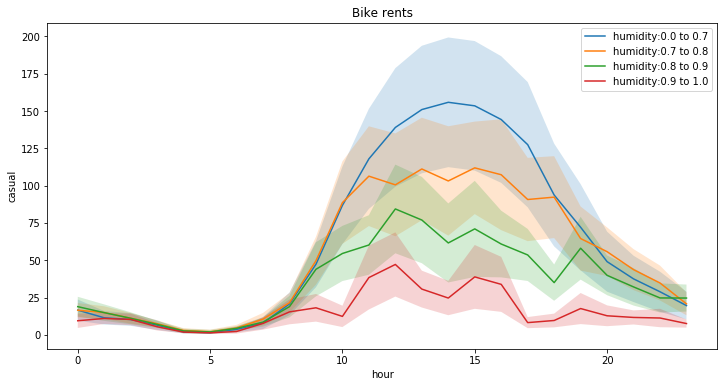

In [262]:
bins_hum = [0., 0.7, 0.8, 0.9, 1. ]
selected_feature = 'casual'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)

fig = plt.figure(num=None, figsize=(12,6))
for i in range(len(bins_hum)-1):
    y = data_humidity[:, i]
    plt.plot(y, label = "humidity:"+str(bins_hum[i])+" to "+str(bins_hum[i+1]))
    plt.fill_between(np.arange(24), y-0.5*error[:, i], y+0.5*error[:, i], alpha = 0.2)
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel(selected_feature)



data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)

fig = plt.figure(num=None, figsize=(12,6))
for i in range(len(bins_hum)-1):
    y = data_humidity[:, i]
    plt.plot(y, label = "humidity:"+str(bins_hum[i])+" to "+str(bins_hum[i+1]))
    plt.fill_between(np.arange(24), y-0.5*error[:, i], y+0.5*error[:, i], alpha = 0.2)
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel(selected_feature)

## Linear regression

The same dataset has also been used in https://christophm.github.io/interpretable-ml-book/limo.html